# Bangalore House Prediction  - Supervised Regression  Problem 

DATA preprocessing 

1. Buasiness Problem  :->
 The main goal of this project is to find the price of the Bangalore house  using their feature 

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# load data

In [3]:
path = "/Users/ankushchoudhari76/Downloads/Bengaluru_House_Data.csv"
df_raw = pd.read_csv(path)
df_raw.shape

(13320, 9)

In [4]:
df_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


# Expolatory DATA Analysis 

In [6]:
df = df_raw.copy() 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# Target Feature<<<<< Price >>>>>>>>

price in lakh

In [8]:
df.describe()
# observe 75%  and max value it shows hugs diff 

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


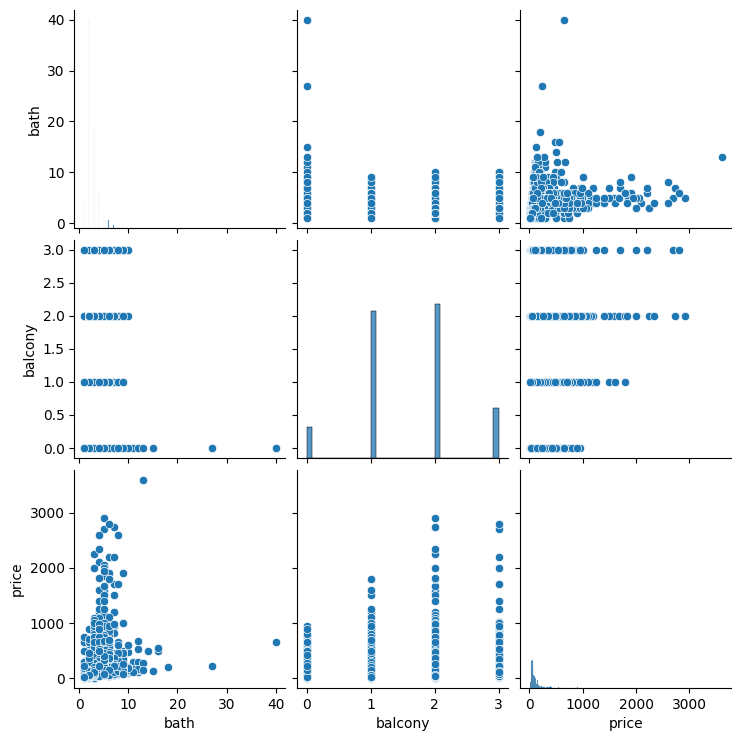

In [9]:
sns.pairplot(df)

# bath and price have slightly linear correlation  with some outiners

In [10]:
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print("--------------------")
       
       

In [11]:
value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
--------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
--------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
--------------------
size
2 BHK    

<Axes: >

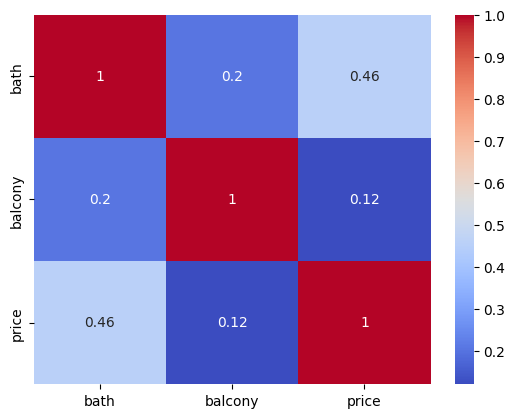

In [12]:
# correlation   heatmap 
num_vars = ["bath" , "balcony" , "price"]
sns.heatmap(df[num_vars].corr(),cmap="coolwarm",annot=True)

# correlation of bath is greatr than  a balcony with price 

# preare Data for Machine  Learning Model 

# Data cleaning 

In [13]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
df.isnull().mean()*100 # % of missing  value

# scoiety has 41.3% missing value (need to drop )

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

<Axes: >

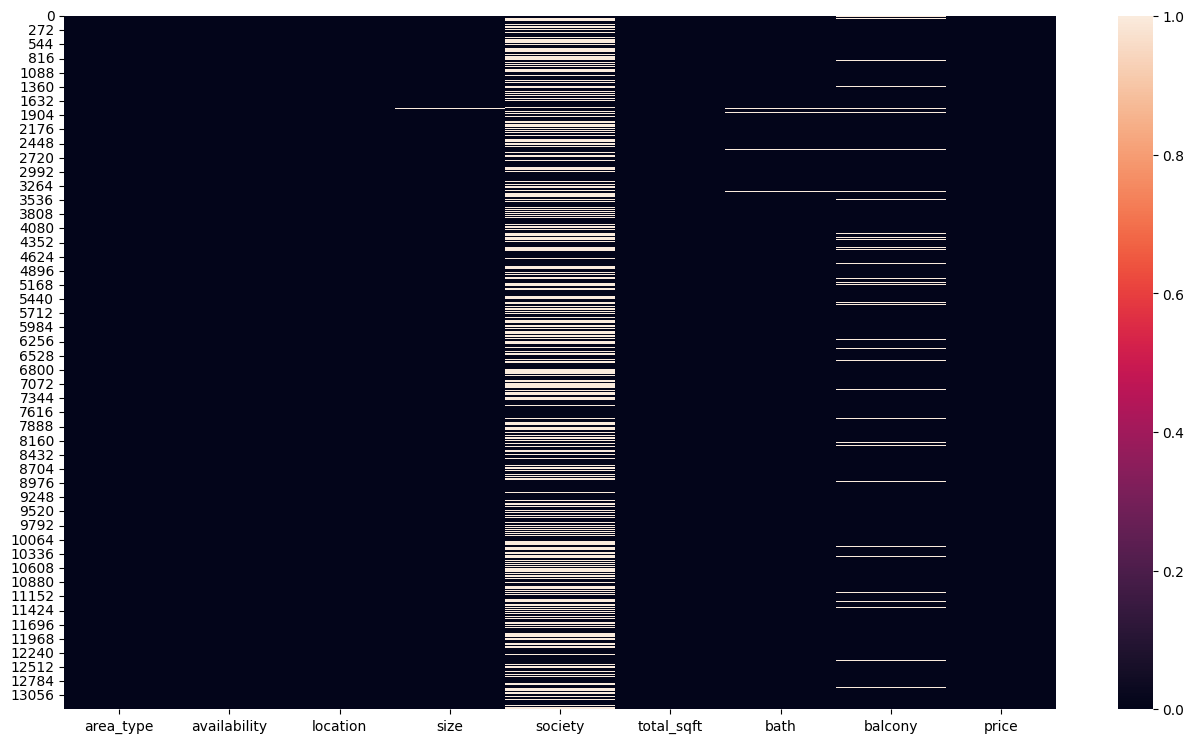

In [15]:
# visulize missing value using heatmap to get idea where  is the values missing 

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [16]:
df2 = df.drop('society',axis='columns')
df2.shape

(13320, 8)

In [17]:
## fill mean value -- >> balcony featue 
df2['balcony']= df2['balcony'].fillna(df2['balcony'].mean())
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [18]:
# drop na value  row from df2 
# bcoz there  is very less % value missing 
df3 = df2.dropna()
df3.shape

(13246, 8)

In [19]:
df3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [20]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


# Feature Engineering 

In [21]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# Converting ' tot_sqft' cat feature in numeric 

In [22]:
df3["total_sqft"].value_counts()

## tot_sqft have contain  int , float , string 
## numerber of strings  142.84sq , meter 
##convert into number by split it .

total_sqft
1200                 843
1100                 221
1500                 204
2400                 195
600                  180
1000                 172
1350                 132
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 100
1140                  91
2000                  82
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1125                  60
1160                  60
1550                  60
950                   59
1700                  58
1180                  58
1260                  57
1255                  56
1080                  55
1220                  55
1070                  53
750                   52
700                   52
4000                  48
1175                  48
1225          

In [23]:
total_sqft_int=[]
for str_val in df3['total_sqft']:
    try:
        total_sqft_int.append(float(str_val))#if '123.4' like this value in str then conver in float
    except:
        try:
          temp=[]
          temp=str_val.split('-')
          total_sqft_int.append((float(temp[0])+float(temp[-1]))/2)#'123-534' this str value split 
        except:
            total_sqft_int.append(np.nan)

In [24]:
# reset the index of dataframe 
df4=df3.reset_index(drop=True) #drop=True- don't add index column in df
df4.shape

(13246, 8)

In [25]:
df5=df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
df5.head()


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0


In [26]:
df5.isnull().sum()

area_type          0
availability       0
location           0
size               0
total_sqft         0
bath               0
balcony            0
price              0
total_sqft_int    46
dtype: int64

In [27]:
df6 = df5.dropna()
df6.shape

(13200, 9)

In [28]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       13200 non-null  object 
 1   availability    13200 non-null  object 
 2   location        13200 non-null  object 
 3   size            13200 non-null  object 
 4   total_sqft      13200 non-null  object 
 5   bath            13200 non-null  float64
 6   balcony         13200 non-null  float64
 7   price           13200 non-null  float64
 8   total_sqft_int  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


## Working on <<< Size >>>  feature 

In [29]:
df6['size'].value_counts()

# size feature shows the number of rooms 


size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [30]:
# 2 bhk = 2 bedroom =2 Rk 
size_int=[]
for str_val in df6['size']:
    temp=[]
    temp=str_val.split(" ")
    try:
      size_int.append(int(temp[0]))
    except:
       size_int.append(np.nan)
       print("Noice=",str_val)




In [31]:
df6 = df6.reset_index(drop=True)

In [32]:
df7 = df6.join(pd.DataFrame({'BHK':size_int}))
df7.shape

(13200, 10)

In [33]:
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


In [34]:
print(df7.columns)


Index(['area_type', 'availability', 'location', 'size', 'total_sqft', 'bath',
       'balcony', 'price', 'total_sqft_int', 'BHK'],
      dtype='object')


Finding outlier and Removeing 

In [35]:
# function to create histogram , Q-Q plot and boxplot 
# for Q-Q plots 

import scipy.stats as stats 

def diagostic_plot(df,variable ):
    # function takes a datafram (df) and 
    # the variable of interest as arguments

    # define figure suze 
    plt.figure(figsize=(8,4))

    # histogram 
    plt.subplot(1, 3, 1)
    sns.displot(df[variable],bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.figure(figsize=(8,4))
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable],dist="norm", plot=plt)
    plt.ylabel('variable quantiles')

    #boxplot 
    plt.figure(figsize=(8,4))
    plt.subplot(1 ,3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
   
    
    plt.show()
 


**** bath *****


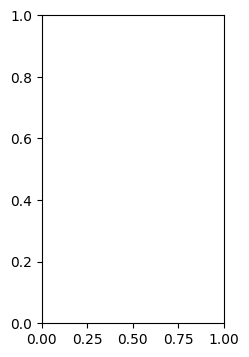

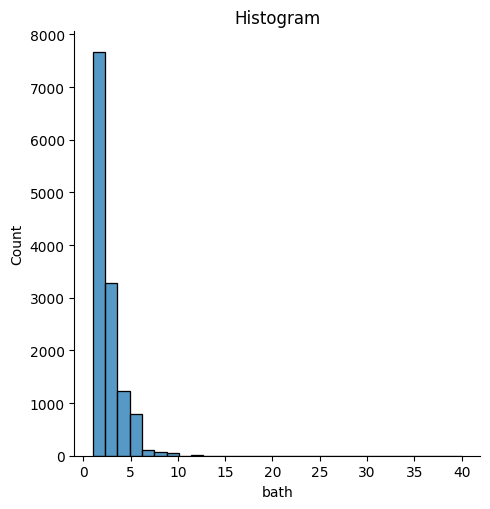

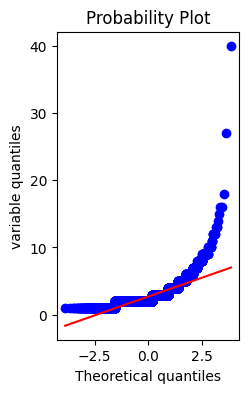

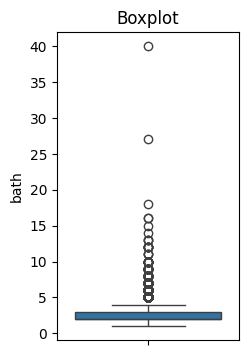

**** balcony *****


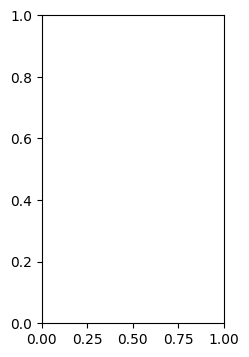

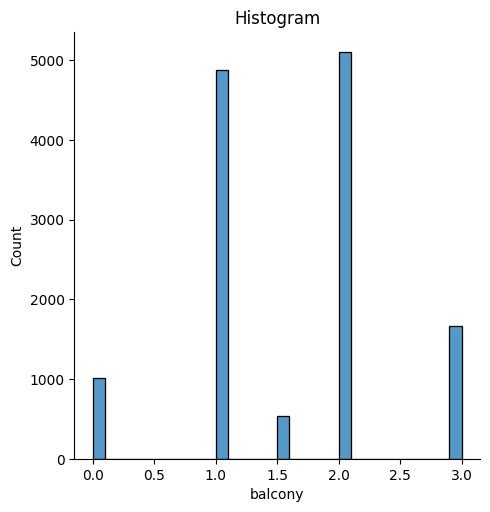

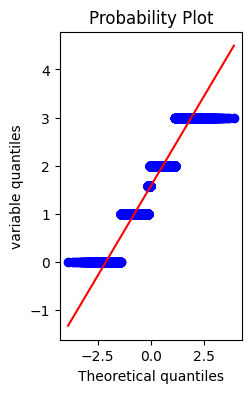

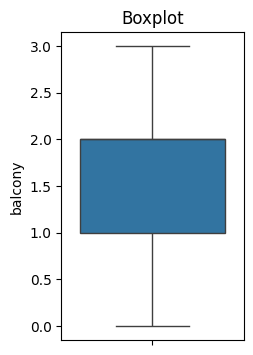

**** total_sqft_int *****


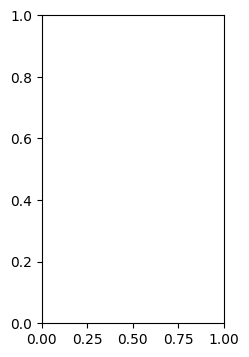

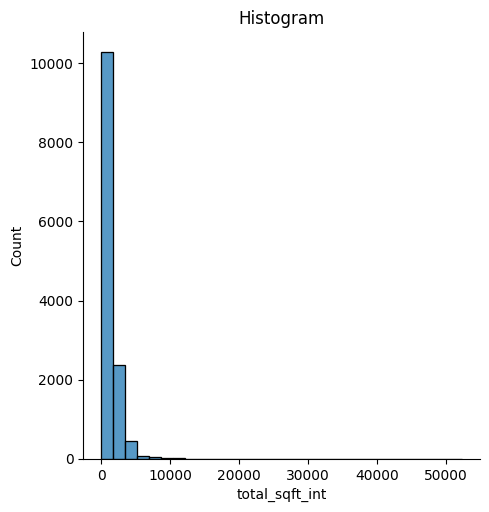

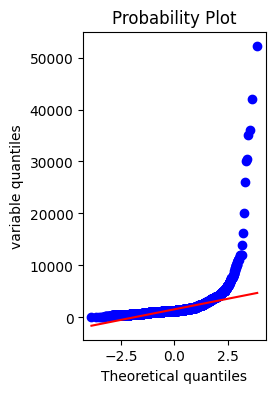

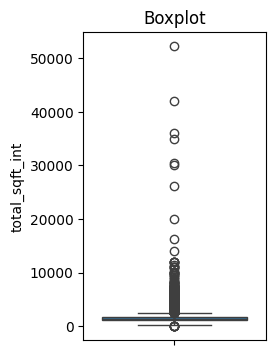

**** BHK *****


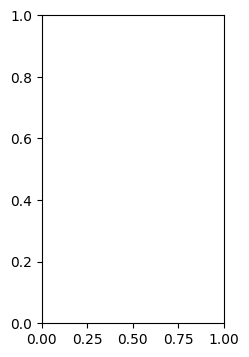

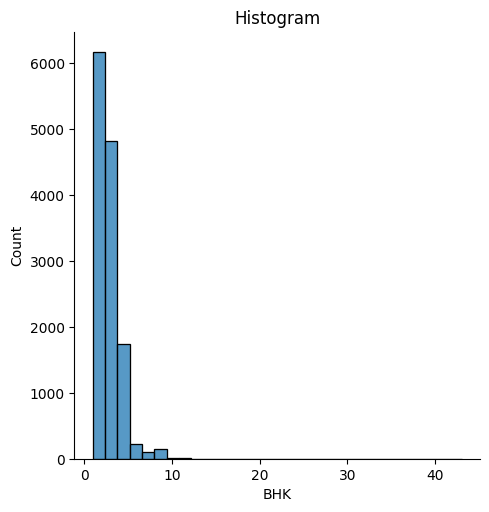

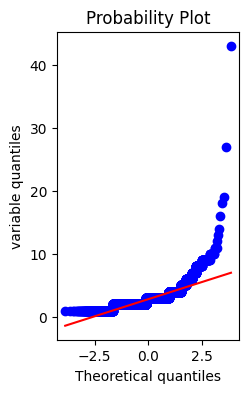

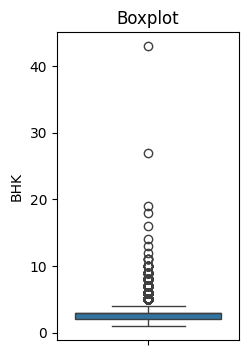

**** price *****


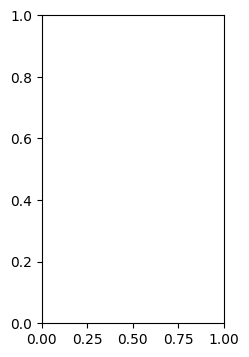

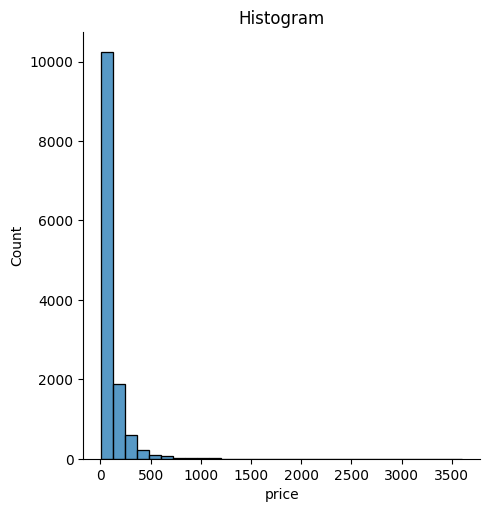

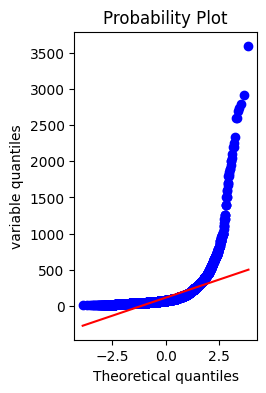

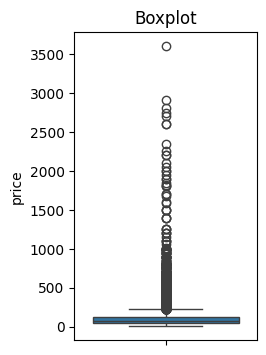

In [36]:
num_vars = ["bath" , "balcony","total_sqft_int", "BHK" ,"price"]
for var in num_vars:
    print("**** {} *****".format(var))
    diagostic_plot(df7,var)

# here we observe outlier using histogram ,, qq plot and box plot     

In [37]:
# here we consider  1  Bhk  requiered  min 350 sqft are 
df7[df7['total_sqft_int']/df7['BHK']<350].head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6


In [38]:
# if 1 BHK total_sqft are < 350 then we are going to remove them 
df8 = df7[~(df7['total_sqft_int']/df7['BHK']<350)]
df8.shape

(12106, 10)

In [39]:
# create new feature  that is price per squre foot 
# it help to find the outliers 

# price in lakh so conver into rupee and then / by total_sqft_int 

df8['price_per_sqft']= df8['price']*100000/ df8['total_sqft_int']
df8.head()

/var/folders/zn/rz8y3h8x49df184xkjs53zhw0000gn/T/ipykernel_11802/3968078470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft']= df8['price']*100000/ df8['total_sqft_int']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [40]:
df8.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [41]:
# removing outliers using help of 'price per sqrt ' taking std  and mean per location 

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduce_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <=(m+st))]
        df_out = pd.concat([df_out, reduce_df],ignore_index=True)
    return df_out 


df9 = remove_pps_outliers(df8)
df9.shape

(8888, 11)

In [42]:
for loc in df9['location'].unique():
    if "Rajaji" in loc:
        print(loc)




Rajaji Nagar


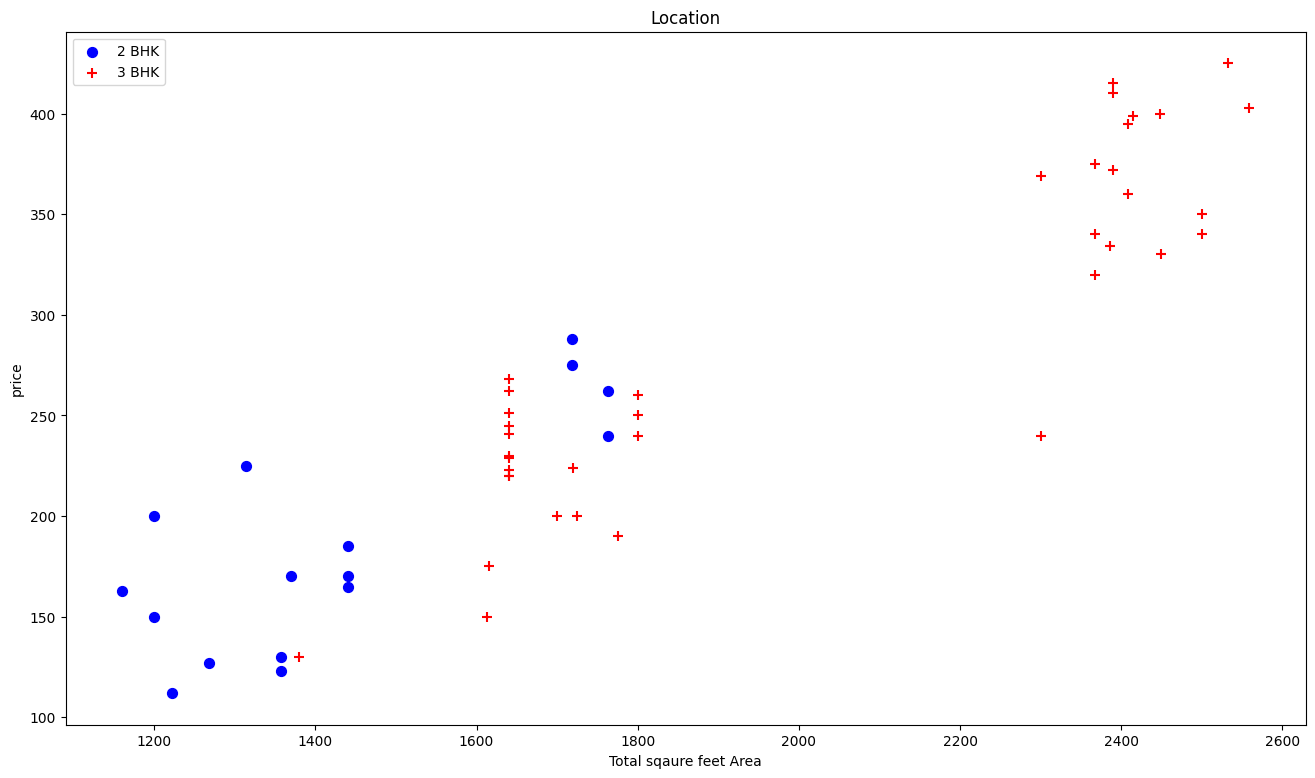

In [43]:
def plot_scatter_chart(df,location):
    bhk2  = df[(df.location ==location) &(df.BHK==2)]
    bhk3  = df[(df.location ==location) &(df.BHK==3)]
    plt.figure(figsize=(16,9))
    plt.scatter(bhk2.total_sqft_int, bhk2.price,color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft_int, bhk3.price,color='RED',label='3 BHK',s=50, marker="+")
    plt.xlabel("Total sqaure feet Area")
    plt.ylabel("price")
    plt.title("Location")
    plt.legend()

plot_scatter_chart(df9, "Rajaji Nagar")  # Correct spelling



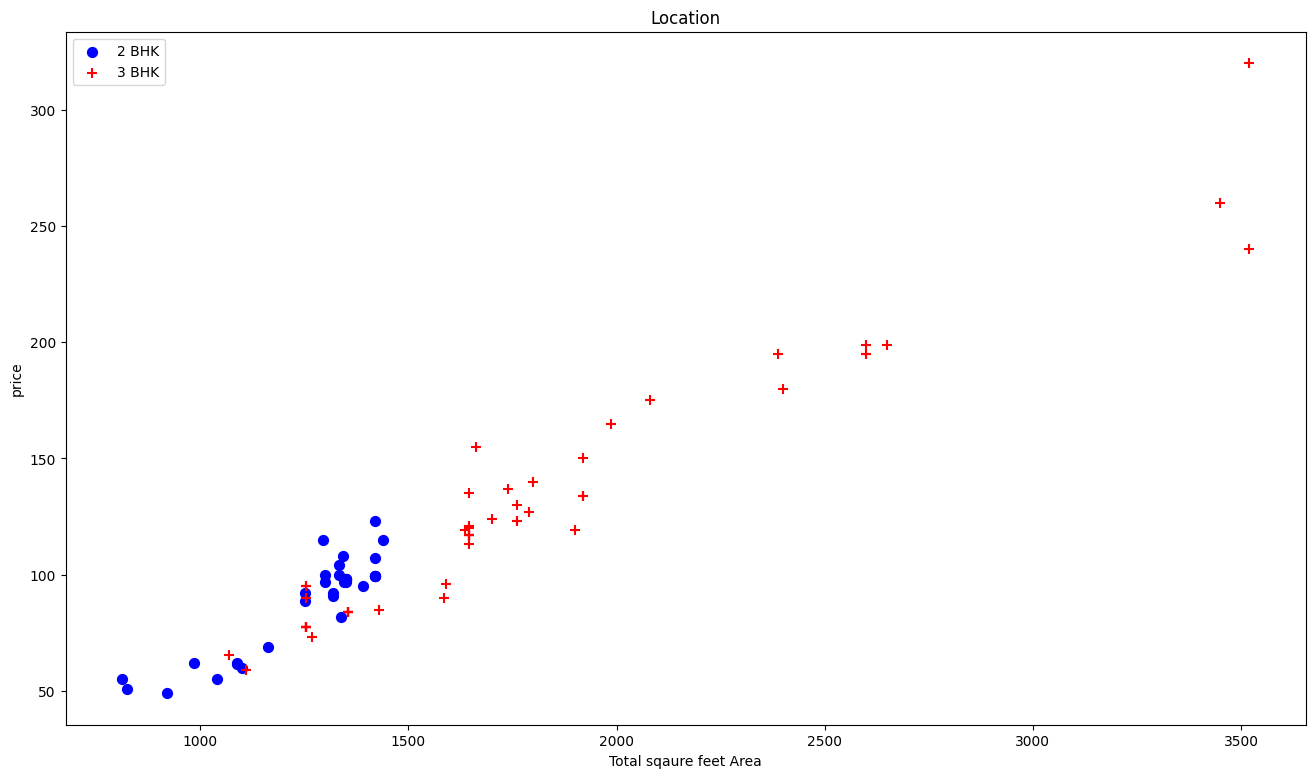

In [44]:
plot_scatter_chart(df9 , "Hebbal")
# in below scatterplot we observe that at same location price  of 
# 3 bhk house is less than 2 bhk so it is outlier

In [45]:
# removing BHK Outliers 
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = ({})
        for BHK, bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for BHK , bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft <(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')  

df10 =  remove_bhk_outliers(df9) 
df10.shape             


(7194, 11)

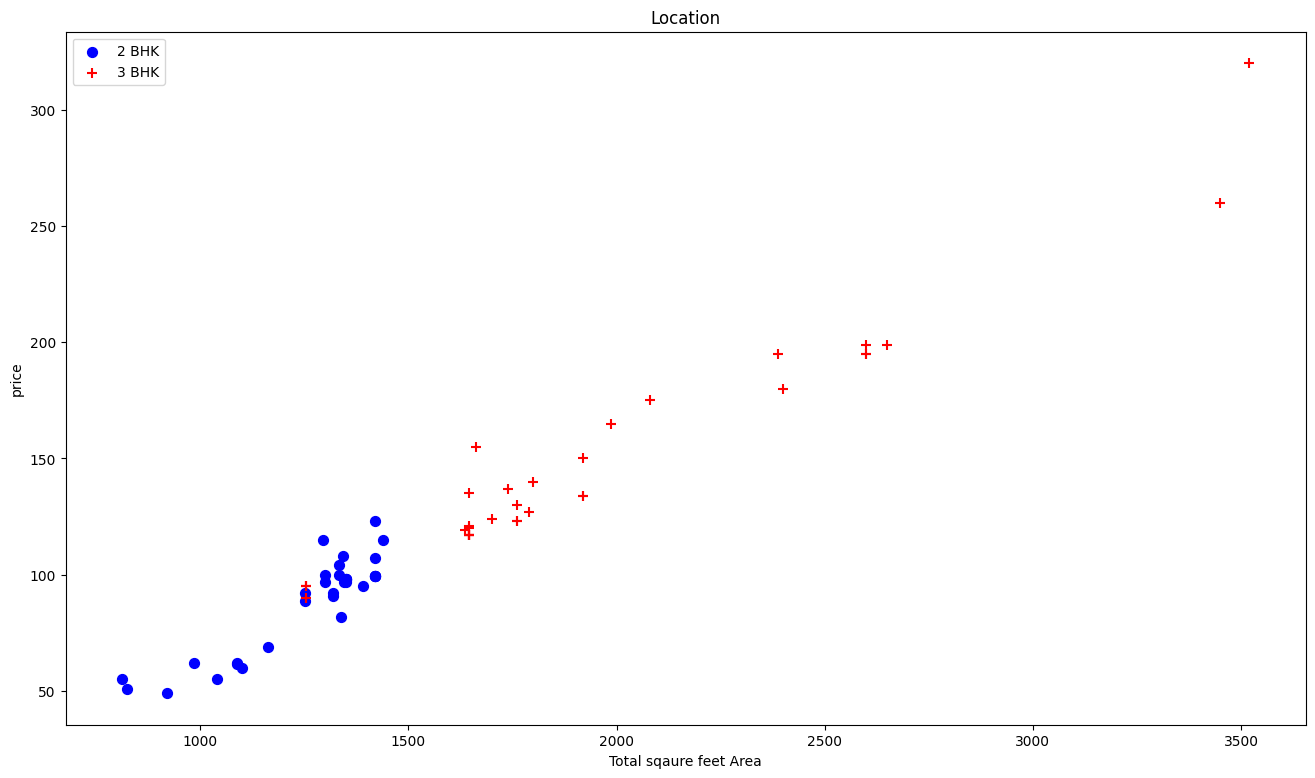

In [46]:
plot_scatter_chart(df10 , "Hebbal")
# in below scatterplot most of the red data the red data 


# Remove outlier using the help of 'bath' feature

In [47]:
df10.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  9.,  6.,  7., 12.])

In [48]:
df10[df10.bath > df10.BHK+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK,price_per_sqft
1861,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,3252.032520
5836,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,6428.571429
7098,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,8819.897689
7569,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,6423.034330


In [49]:
# here  we are considering data only total no  bathroom  = bhk +1

df11 = df10[df10.bath < df10.BHK+2]
df11.shape

(7120, 11)

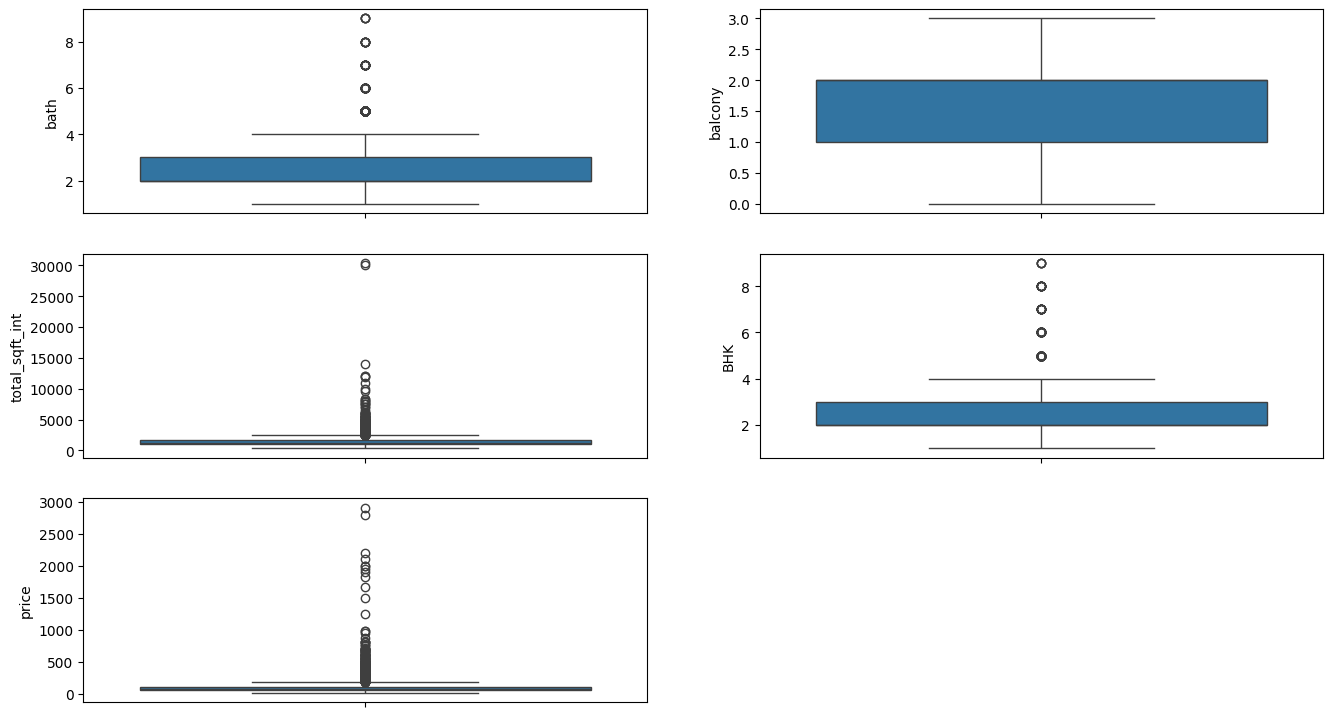

In [50]:
plt.figure(figsize=(16,9))
for i , var in enumerate(num_vars):
   plt.subplot(3,2,i+1)
   sns.boxplot(df11[var])

In [51]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,BHK,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2 Bedroom,1200,2.0,2.0,83.0,1200.0,2,6916.666667


In [52]:
df12 =df11.drop(['area_type', 'availability' , 'location', 'size',"total_sqft"],axis=1 )
df12.head()

,bath,balcony,price,total_sqft_int,BHK,price_per_sqft
0,3.0,2.0,150.0,1672.0,3,8971.291866
1,3.0,3.0,149.0,1750.0,3,8514.285714
2,3.0,2.0,150.0,1750.0,3,8571.428571
4,2.0,2.0,40.0,1250.0,2,3200.000000
5,2.0,2.0,83.0,1200.0,2,6916.666667


In [53]:
df12.to_csv("clean_data.csv",index=True)  # test ml model on this data
# Ml model train  on this data and got best score 

# categorical variable Encoding 

In [54]:
df13=df11.drop(['size','total_sqft'],axis=1)
df13.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,BHK,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


In [55]:
df14 = pd.get_dummies(df13 , drop_first=True, columns=['area_type','availability', 'location' ])
df14.shape

(7120, 820)

In [56]:
df14.head()

,bath,balcony,price,total_sqft_int,BHK,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_15-Jun,availability_15-Nov,availability_15-Oct,availability_16-Dec,availability_16-Jul,availability_16-Mar,availability_16-Nov,availability_16-Oct,availability_16-Sep,availability_17-Apr,availability_17-Aug,availability_17-Dec,availability_17-Jan,availability_17-Jul,availability_17-Jun,availability_17-Mar,availability_17-May,availability_17-Nov,availability_17-Oct,availability_17-Sep,availability_18-Apr,availability_18-Aug,availability_18-Dec,availability_18-Feb,availability_18-Jan,availability_18-Jul,availability_18-Jun,availability_18-Mar,availability_18-May,availability_18-Nov,availability_18-Oct,availability_18-Sep,availability_19-Apr,availability_19-Aug,availability_19-Dec,availability_19-Feb,availability_19-Jan,availability_19-Jul,availability_19-Jun,availability_19-Mar,availability_19-May,availability_19-Oct,availability_19-Sep,availability_20-Apr,availability_20-Aug,availability_20-Dec,availability_20-Jan,availability_20-Jun,availability_20-Mar,availability_20-May,availability_20-Nov,availability_20-Oct,availability_20-Sep,availability_21-Dec,availability_21-Feb,availability_21-Jan,availability_21-Jul,availability_21-Jun,availability_21-Mar,availability_21-May,availability_21-Nov,availability_21-Oct,availability_21-Sep,availability_22-Dec,availability_22-Jan,availability_22-Jun,availability_22-Mar,availability_22-May,availability_22-Nov,availability_Ready To Move,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ south,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Indira Nagar,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_3rd Block Banashankari,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase JP Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Abbaiah Reddy Layout,location_Abbigere,location_Agrahara Dasarahalli,location_Aishwarya Crystal Layout,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshya Nagar,location_Alfa Garden Layout,location_Alur,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Ananth Nagar,location_Anekal,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekere,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Atmananda Colony,location_Attibele,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_BCC Layout,location_BCMC Layout,location_BEL Road,location_BEML Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Bag

In [57]:
df14.to_csv("oh_encoded_data.csv",index=False) # teat ml model on this data

'area_type','availability', 'location' -> contain multiple class and   if  we convert in one hot incoding so it increase size of DF 

# working on <<< area_type >>> feature

In [58]:
df13['area_type'].value_counts()

area_type
Super built-up  Area    5345
Built-up  Area          1298
Plot  Area               441
Carpet  Area              36
Name: count, dtype: int64

In [59]:
df15 = df13.copy()

 # one- hot encoding on "area_type " feature 
for cat_var in ["Super built-up  Area ","Built-up  Area","Plot  Area  "]:
    df15["area_type"+cat_var]=np.where(df15["area_type"]==cat_var,1,0)
df15.shape    
    


(7120, 12)

## Working with <<<< availability >>>>Feature

In [60]:
df15["availability"].value_counts()

availability
Ready To Move    5644
18-Dec            159
18-May            156
18-Apr            154
18-Aug            118
19-Dec            101
18-Jul             76
18-Mar             72
21-Dec             55
20-Dec             54
18-Jun             51
19-Mar             48
18-Feb             36
18-Nov             26
18-Oct             24
19-Jun             24
19-Jan             19
20-Jan             18
18-Sep             18
18-Jan             17
17-Dec             14
17-Oct             13
21-Mar             13
21-Jun             13
19-Sep             12
19-Aug             11
19-Jul             11
17-Jul             10
21-Jan             10
17-Jun              9
19-Apr              9
22-Dec              7
19-Oct              7
20-Jun              7
17-May              6
21-Jul              6
20-Aug              6
17-Sep              6
20-Oct              6
20-Sep              5
21-Feb              5
21-Oct              4
20-Nov              4
17-Nov              4
17-Apr             

In [61]:
df15["availability_Ready To move "] = np.where(df15["availability"]=="ready to move ", 1,0)
df15.shape

(7120, 13)

## working on <<<<<< location >>>>>> Feature

In [62]:
location_value_count = df15["location"].value_counts()
location_value_count

location
Whitefield                             234
Sarjapur  Road                         183
Electronic City                        158
Marathahalli                           116
Raja Rajeshwari Nagar                  116
Haralur Road                           116
Hennur Road                            108
Bannerghatta Road                      108
Uttarahalli                            106
Thanisandra                            103
Electronic City Phase II                89
Hebbal                                  87
Yelahanka                               86
7th Phase JP Nagar                      86
Kanakpura Road                          85
KR Puram                                61
Sarjapur                                56
Rajaji Nagar                            55
Bellandur                               53
Kasavanhalli                            53
Begur Road                              51
Banashankari                            49
Kothanur                                49
Ho

In [63]:
location_gret_20 = location_value_count[location_value_count>=20].index
location_gret_20


Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Marathahalli',
       'Raja Rajeshwari Nagar', 'Haralur Road', 'Hennur Road',
       'Bannerghatta Road', 'Uttarahalli', 'Thanisandra',
       'Electronic City Phase II', 'Hebbal', 'Yelahanka', '7th Phase JP Nagar',
       'Kanakpura Road', 'KR Puram', 'Sarjapur', 'Rajaji Nagar', 'Bellandur',
       'Kasavanhalli', 'Begur Road', 'Banashankari', 'Kothanur', 'Hormavu',
       'Harlur', 'Akshaya Nagar', 'Electronics City Phase 1', 'Jakkur',
       'Varthur', 'HSR Layout', 'Hennur', 'Ramamurthy Nagar', 'Chandapura',
       'Koramangala', 'Kaggadasapura', 'Kundalahalli', 'Ramagondanahalli',
       'Budigere', 'Hulimavu', 'Hoodi', 'Malleshwaram', 'Hegde Nagar',
       'Yeshwanthpur', 'Gottigere', '8th Phase JP Nagar', 'JP Nagar',
       'Channasandra', 'Bisuvanahalli', 'Vittasandra', 'Indira Nagar',
       'Old Airport Road', 'Sahakara Nagar', 'Brookefield', 'Kengeri',
       'Hosa Road', 'Vijayanagar', 'Balagere', 'Green Glen Layout

In [64]:
df16= df15.copy()

for cat_var in location_gret_20:
    df16["location"+cat_var]=np.where(df16["location"]==cat_var,1,0)
df16.shape    
    

/var/folders/zn/rz8y3h8x49df184xkjs53zhw0000gn/T/ipykernel_11802/4184746509.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df16["location"+cat_var]=np.where(df16["location"]==cat_var,1,0)


(7120, 111)

In [65]:
df16.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,BHK,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To move,locationWhitefield,locationSarjapur Road,locationElectronic City,locationMarathahalli,locationRaja Rajeshwari Nagar,locationHaralur Road,locationHennur Road,locationBannerghatta Road,locationUttarahalli,locationThanisandra,locationElectronic City Phase II,locationHebbal,locationYelahanka,location7th Phase JP Nagar,locationKanakpura Road,locationKR Puram,locationSarjapur,locationRajaji Nagar,locationBellandur,locationKasavanhalli,locationBegur Road,locationBanashankari,locationKothanur,locationHormavu,locationHarlur,locationAkshaya Nagar,locationElectronics City Phase 1,locationJakkur,locationVarthur,locationHSR Layout,locationHennur,locationRamamurthy Nagar,locationChandapura,locationKoramangala,locationKaggadasapura,locationKundalahalli,locationRamagondanahalli,locationBudigere,locationHulimavu,locationHoodi,locationMalleshwaram,locationHegde Nagar,locationYeshwanthpur,locationGottigere,location8th Phase JP Nagar,locationJP Nagar,locationChannasandra,locationBisuvanahalli,locationVittasandra,locationIndira Nagar,locationOld Airport Road,locationSahakara Nagar,locationBrookefield,locationKengeri,locationHosa Road,locationVijayanagar,locationBalagere,locationGreen Glen Layout,locationBommasandra,locationRachenahalli,locationPanathur,locationOld Madras Road,locationKudlu Gate,locationMysore Road,locationThigalarapalya,locationTalaghattapura,locationKadugodi,locationAmbedkar Nagar,locationJigani,locationYelahanka New Town,locationFrazer Town,locationKanakapura,locationAttibele,locationDodda Nekkundi,locationDevanahalli,locationLakshminarayana Pura,locationNagarbhavi,location5th Phase JP Nagar,locationTC Palaya,locationAnanth Nagar,locationAnekal,locationKudlu,locationCV Raman Nagar,locationJalahalli,locationKengeri Satellite Town,locationDoddathoguru,locationBhoganhalli,locationSubramanyapura,locationKalena Agrahara,locationHoramavu Agara,locationVidyaranyapura,locationHosur Road,locationHebbal Kempapura,locationBTM 2nd Stage,locationDomlur,locationHoramavu Banaswadi,locationTumkur Road,locationMahadevpura
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
df17 = df16.drop(["area_type" ,"availability","location" ], axis= 1)
df17.shape

(7120, 108)

In [67]:
df17.head()

,bath,balcony,price,total_sqft_int,BHK,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To move,locationWhitefield,locationSarjapur Road,locationElectronic City,locationMarathahalli,locationRaja Rajeshwari Nagar,locationHaralur Road,locationHennur Road,locationBannerghatta Road,locationUttarahalli,locationThanisandra,locationElectronic City Phase II,locationHebbal,locationYelahanka,location7th Phase JP Nagar,locationKanakpura Road,locationKR Puram,locationSarjapur,locationRajaji Nagar,locationBellandur,locationKasavanhalli,locationBegur Road,locationBanashankari,locationKothanur,locationHormavu,locationHarlur,locationAkshaya Nagar,locationElectronics City Phase 1,locationJakkur,locationVarthur,locationHSR Layout,locationHennur,locationRamamurthy Nagar,locationChandapura,locationKoramangala,locationKaggadasapura,locationKundalahalli,locationRamagondanahalli,locationBudigere,locationHulimavu,locationHoodi,locationMalleshwaram,locationHegde Nagar,locationYeshwanthpur,locationGottigere,location8th Phase JP Nagar,locationJP Nagar,locationChannasandra,locationBisuvanahalli,locationVittasandra,locationIndira Nagar,locationOld Airport Road,locationSahakara Nagar,locationBrookefield,locationKengeri,locationHosa Road,locationVijayanagar,locationBalagere,locationGreen Glen Layout,locationBommasandra,locationRachenahalli,locationPanathur,locationOld Madras Road,locationKudlu Gate,locationMysore Road,locationThigalarapalya,locationTalaghattapura,locationKadugodi,locationAmbedkar Nagar,locationJigani,locationYelahanka New Town,locationFrazer Town,locationKanakapura,locationAttibele,locationDodda Nekkundi,locationDevanahalli,locationLakshminarayana Pura,locationNagarbhavi,location5th Phase JP Nagar,locationTC Palaya,locationAnanth Nagar,locationAnekal,locationKudlu,locationCV Raman Nagar,locationJalahalli,locationKengeri Satellite Town,locationDoddathoguru,locationBhoganhalli,locationSubramanyapura,locationKalena Agrahara,locationHoramavu Agara,locationVidyaranyapura,locationHosur Road,locationHebbal Kempapura,locationBTM 2nd Stage,locationDomlur,locationHoramavu Banaswadi,locationTumkur Road,locationMahadevpura
0,3.0,2.0,150.0,1672.0,3,8971.291866,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,40.0,1250.0,2,3200.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
df17.to_csv('ohe_data_reduce_cat_class.csv',index=False)